In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# deep learniong
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
import os 
import cv2
from tqdm import tqdm

#path of img
imagePaths = []

for dirname, _, filenames in os.walk("/kaggle/input"):

 # only process files inside the images
    if 'images' in dirname:
        for filename in filenames:
            if filename.endswith('png'):
                imagePaths.append(os.path.join(dirname , filename))

# img preprocessing

In [3]:


data = []
target = []
resize = 150 

cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'}


for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-3]  # Extract the label from parent folder (2 levels up from image)
    
    if label not in cat:
        continue # skip this image
        
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) / 255.0  # Normalize image pixels to [0, 1]

    data.append(image)
    target.append(cat[label])

print(f"Processed {len(data)} images with corresponding labels.")

100%|██████████| 21165/21165 [02:23<00:00, 147.12it/s]  

Processed 15153 images with corresponding labels.


In [4]:
print(len(data))
print(len(target))

15153
15153


In [5]:
target[11000]

'Pneumonia'

In [6]:
# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[-1])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [8]:
# Initial split
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# Further split the training data into training and validation sets
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.20, stratify=y_train, random_state=42)


trainX = np.array(x_train)
valX = np.array(x_val)
testX = np.array(x_test)
trainY = np.array(y_train)
valY = np.array(y_val)
testY = np.array(y_test)

print("Training data shape:", trainX.shape)
print("Validation data shape:", valX.shape)
print("Testing data shape:", testX.shape)
print("Training labels shape:", trainY.shape)
print("Validation labels shape:", valY.shape)
print("Testing labels shape:", testY.shape)

Training data shape: (9697, 150, 150, 3)
Validation data shape: (2425, 150, 150, 3)
Testing data shape: (3031, 150, 150, 3)
Training labels shape: (9697, 3)
Validation labels shape: (2425, 3)
Testing labels shape: (3031, 3)


In [14]:
# Define the model
s = 150  # Size

model = Sequential()


# Feature Extraction Parts
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(s, s, 3), kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))


# ann = dense layers

# Nueral Network (Dense Layers)
model.add(Flatten())  # 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))



# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Train the model with validation data
epochs = 30
history = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1, validation_data=(valX, valY))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.7702 - loss: 0.8258 - val_accuracy: 0.9014 - val_loss: 0.2577
Epoch 2/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8910 - loss: 0.2706 - val_accuracy: 0.9146 - val_loss: 0.2262
Epoch 3/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9329 - loss: 0.1737 - val_accuracy: 0.9101 - val_loss: 0.2355
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9510 - loss: 0.1314 - val_accuracy: 0.9427 - val_loss: 0.1697
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9645 - loss: 0.1058 - val_accuracy: 0.9476 - val_loss: 0.1593
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9733 - loss: 0.0744 - val_accuracy: 0.9353 - val_loss: 0.1777
Epoch 7/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9739 - loss: 0.0660 - val_accuracy: 0.9456 - val_loss: 0.1719
Epoch 8/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9793 - loss: 0.0587 - val_acc

In [10]:
history.history

{'accuracy': [0.8091162443161011,
  0.8984221816062927,
  0.9297720789909363,
  0.9437970519065857,
  0.9518407583236694,
  0.9639063477516174,
  0.9681344628334045,
  0.9760750532150269,
  0.9770032167434692,
  0.982159435749054,
  0.9853562712669373,
  0.9859750270843506,
  0.9851500391960144,
  0.9907187819480896,
  0.9886562824249268,
  0.9898937940597534,
  0.9859750270843506,
  0.9943281412124634,
  0.9922656416893005,
  0.992368757724762,
  0.9928843975067139,
  0.9932969212532043,
  0.9944312572479248,
  0.9907187819480896,
  0.992678165435791,
  0.9945343732833862,
  0.9961844086647034,
  0.9949468970298767,
  0.9884500503540039,
  0.9941219091415405,
  0.9966999888420105,
  0.9965968728065491,
  0.99556565284729,
  0.99556565284729,
  0.9962875247001648,
  0.9963906407356262,
  0.9956687688827515,
  0.9950500130653381,
  0.9941219091415405,
  0.9970093965530396,
  0.9945343732833862,
  0.9954625368118286,
  0.9951531291007996,
  0.9950500130653381,
  0.9966999888420105,
  0.9

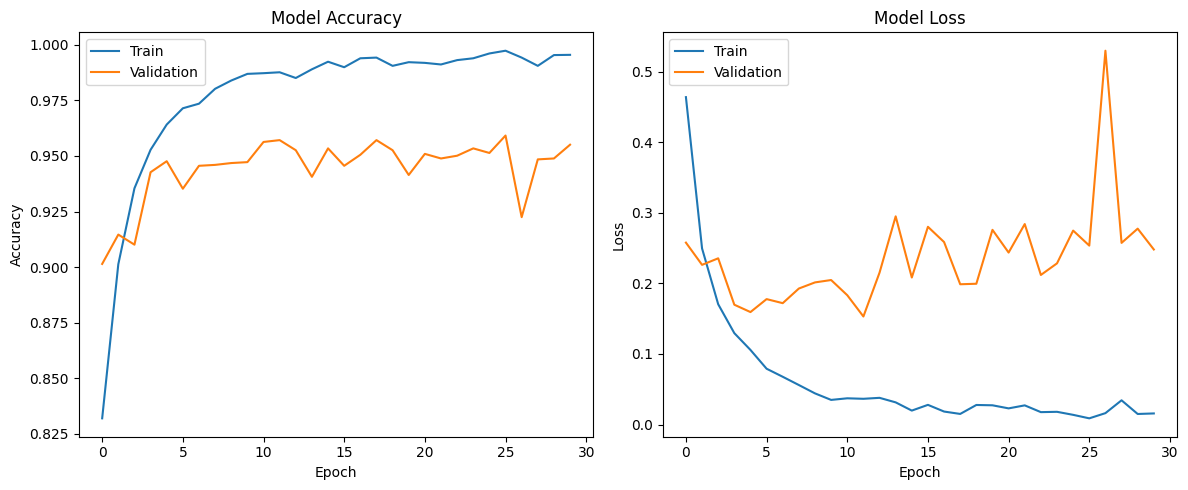

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [16]:
# Make predictions
predictions = model.predict(testX)
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Convert testY from one-hot encoded to class labels (integers)
y_true = np.argmax(testY, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[[ 662   59    2]
 [  33 2003    3]
 [   3   19  247]]


In [17]:
cls = le.classes_

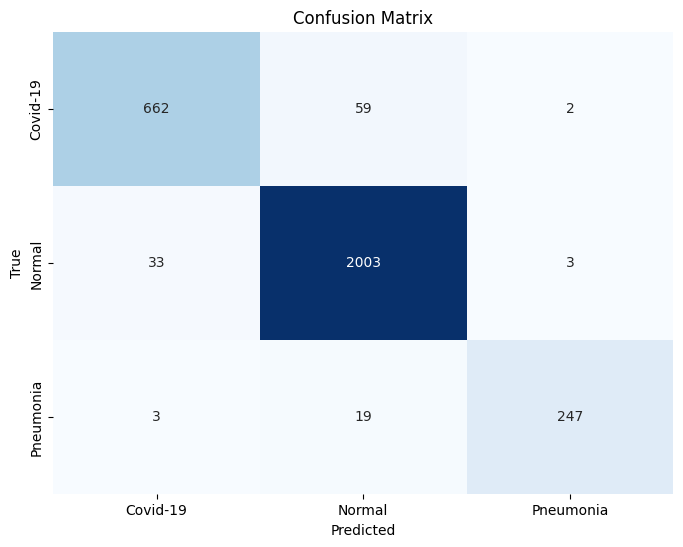

In [18]:
# Create DataFrame for the confusion matrix
Confusion_Matrix = pd.DataFrame(cm, index=cls, columns=cls)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(y_true, y_pred, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.94842   0.91563   0.93174       723
      Normal    0.96252   0.98234   0.97233      2039
   Pneumonia    0.98016   0.91822   0.94818       269

    accuracy                        0.96074      3031
   macro avg    0.96370   0.93873   0.95075      3031
weighted avg    0.96072   0.96074   0.96050      3031



In [14]:
model.save('CNN_Covid19_model.h5') 


import pickle

pickle.dump(le, open("Label_encoder.pkl",'wb'))
print("saved")

saved


In [16]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('CNN_Covid19_model.h5')

le = pickle.load(open("Label_encoder.pkl",'rb'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


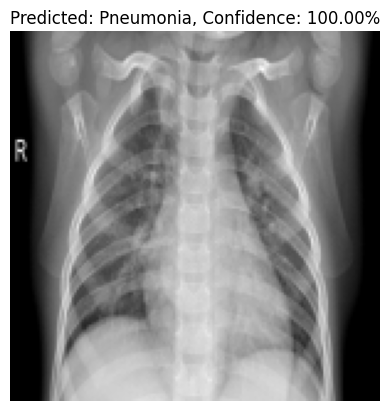

Predicted Label: Pneumonia, Confidence Score: 100.00%


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detection_system(image_path, model, label_encoder, image_size=150):
    """
    Detection system function to classify an input image.

    Parameters:
    - image_path: The path to the image to classify.
    - model: The trained Keras model.
    - label_encoder: The LabelEncoder used to encode the labels.
    - image_size: The target size for resizing the image (default: 150x150).
    
    Returns:
    - predicted_label: The predicted class label.
    - confidence_score: The confidence score of the predicted class.
    """
    # Load the image from the provided path
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    # Convert image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the same size as the training images
    image_resized = cv2.resize(image_rgb, (image_size, image_size))
    
    # Normalize the pixel values to the range [0, 1]
    image_normalized = image_resized / 255.0
    
    # Expand the dimensions to match the input shape for the model
    image_input = np.expand_dims(image_normalized, axis=0)
    
    # Predict the class of the image
    predictions = model.predict(image_input)
    
    # Get the predicted class index and confidence score
    predicted_index = np.argmax(predictions)
    confidence_score = predictions[0][predicted_index]
    
    # Decode the predicted index back to the original label
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]
    
    
    # Display the image with the predicted label and confidence score
    plt.imshow(image_resized)
    plt.title(f"Predicted: {predicted_label}, Confidence: {confidence_score*100:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence_score

# Example usage
image_path = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1000.png"  # Replace with the path to your image
predicted_label, confidence_score = detection_system(image_path, model, le)
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


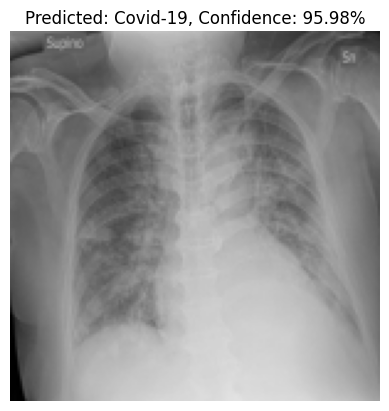

Predicted Label: Covid-19, Confidence Score: 95.98%


In [18]:
# Example usage
image_path ="/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/COVID-10.png"
predicted_label, confidence_score = detection_system(image_path, model, le)
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")